In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


df = pd.read_csv('/kaggle/input/credit-card-fraud-detection/credit_card_fraud_dataset.csv')

/kaggle/input/credit-card-fraud-detection/credit_card_fraud_dataset.csv


# Import necessary libraries
Libraries used in this project are:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import functions for splitting data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Import logistic regression model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Import functions for evaluating model performance
from sklearn.ensemble import RandomForestClassifier

# Import ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Import support vector machine model
from sklearn.tree import DecisionTreeClassifier
# Import decision tree model
from sklearn.neighbors import KNeighborsClassifier
# Import k-nearest neighbors model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


# Read the credit card fraud dataset from a CSV file

In [3]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


Droping the 'TransactionID' and 'MerchantID' columns from the dataframe.

TransactionID and MerchantID are not useful for the prediction task.

merchant id is may or may not be cvv numbers so it is not useful for the prediction task

& TransactionID is just numbers assigned to each rows.

In [4]:

df = df.drop(['TransactionID', 'MerchantID'], axis=1)
# Display the first 5 rows of the dataframe
df.head()

,TransactionDate,Amount,TransactionType,Location,IsFraud
0,2024-04-03 14:15:35.462794,4189.27,refund,San Antonio,0
1,2024-03-19 13:20:35.462824,2659.71,refund,Dallas,0
2,2024-01-08 10:08:35.462834,784.00,purchase,New York,0
3,2024-04-13 23:50:35.462850,3514.40,purchase,Philadelphia,0
4,2024-07-12 18:51:35.462858,369.07,purchase,Phoenix,0


Print the shape of the dataframe

Count the number of occurrences of each value in the 'IsFraud' column and proportion the counts

In [5]:
print(df.shape)


df['IsFraud'].value_counts(normalize=True)

(100000, 5)


IsFraud
0    0.99
1    0.01
Name: proportion, dtype: float64

In [6]:
print(df['Location'].unique(),'\n',(df['TransactionType'].unique()))

['San Antonio' 'Dallas' 'New York' 'Philadelphia' 'Phoenix' 'Chicago'
 'San Jose' 'San Diego' 'Houston' 'Los Angeles'] 
 ['refund' 'purchase']


In [7]:
df.dtypes

TransactionDate     object
Amount             float64
TransactionType     object
Location            object
IsFraud              int64
dtype: object

Convert the 'TransactionDate' column to datetime format

In [8]:

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
# Extract the year from the 'TransactionDate' column and create a new column 'year'
df['year']= df['TransactionDate'].dt.year
# Extract the month from the 'TransactionDate' column and create a new column 'month'
df['month']= df['TransactionDate'].dt.month
# Extract the day from the 'TransactionDate' column and create a new column 'day'
df['day']= df['TransactionDate'].dt.day
# Display the first 5 rows of the dataframe
df.head()

,TransactionDate,Amount,TransactionType,Location,IsFraud,year,month,day
0,2024-04-03 14:15:35.462794,4189.27,refund,San Antonio,0,2024,4,3
1,2024-03-19 13:20:35.462824,2659.71,refund,Dallas,0,2024,3,19
2,2024-01-08 10:08:35.462834,784.00,purchase,New York,0,2024,1,8
3,2024-04-13 23:50:35.462850,3514.40,purchase,Philadelphia,0,2024,4,13
4,2024-07-12 18:51:35.462858,369.07,purchase,Phoenix,0,2024,7,12


In [9]:
df = df.drop(['TransactionDate'], axis=1)
df['year'].unique()


array([2024, 2023], dtype=int32)

In [10]:
df = df.drop(['year'], axis=1)

In [11]:
df.head()

,Amount,TransactionType,Location,IsFraud,month,day
0,4189.27,refund,San Antonio,0,4,3
1,2659.71,refund,Dallas,0,3,19
2,784.00,purchase,New York,0,1,8
3,3514.40,purchase,Philadelphia,0,4,13
4,369.07,purchase,Phoenix,0,7,12


In [12]:
df.drop(['TransactionType'], axis=1)

,Amount,Location,IsFraud,month,day
0,4189.27,San Antonio,0,4,3
1,2659.71,Dallas,0,3,19
2,784.00,New York,0,1,8
3,3514.40,Philadelphia,0,4,13
4,369.07,Phoenix,0,7,12
...,...,...,...,...,...
99995,1057.29,San Antonio,0,6,7
99996,297.25,San Antonio,0,10,22
99997,3448.56,San Antonio,0,5,31
99998,3750.79,Philadelphia,0,10,18


# Data Visualization
Loop through each column in the dataframe

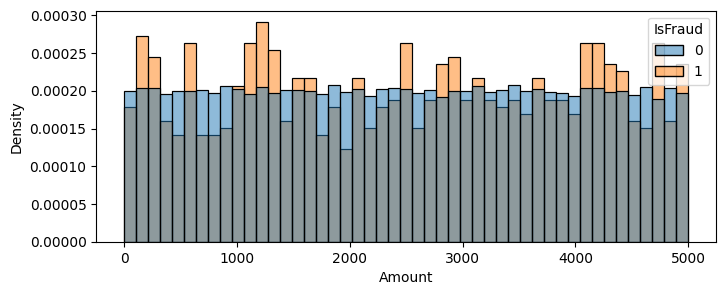

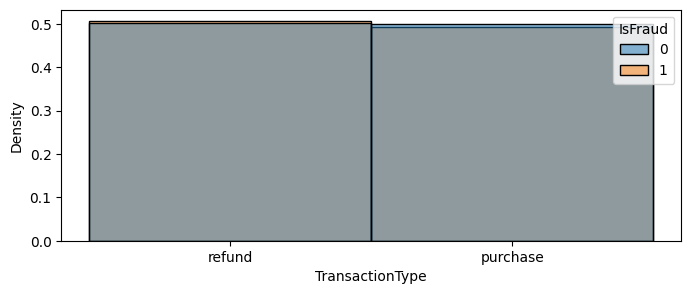

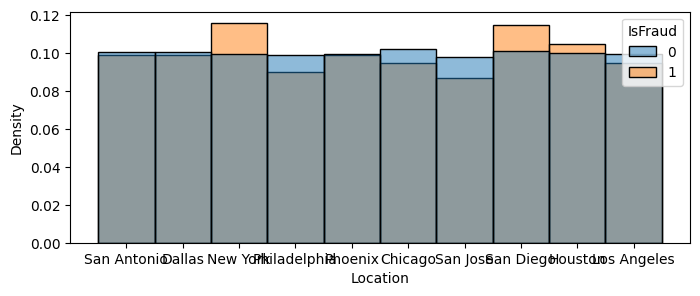

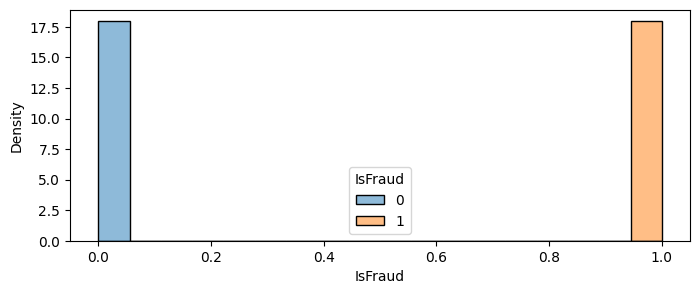

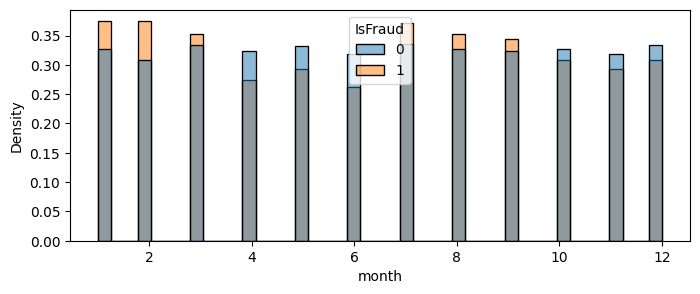

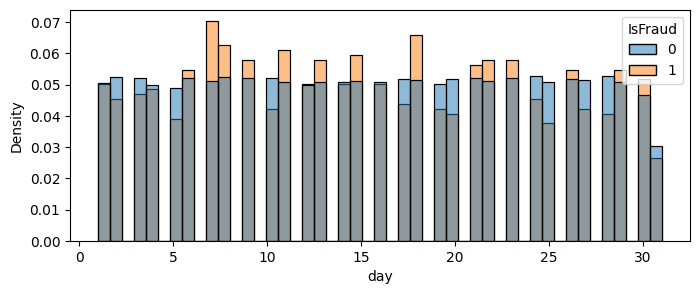

In [13]:
for c in df.columns:
    # Create a new figure with a size of 8x3
    plt.figure(figsize=(8,3))
    # Plot a histogram of the column, with the color of the bars determined by the 'IsFraud' column
    sns.histplot(df,x=c,hue='IsFraud',stat='density',common_norm=False)
    # Display the plot
    plt.show()

<Figure size 1200x500 with 0 Axes>

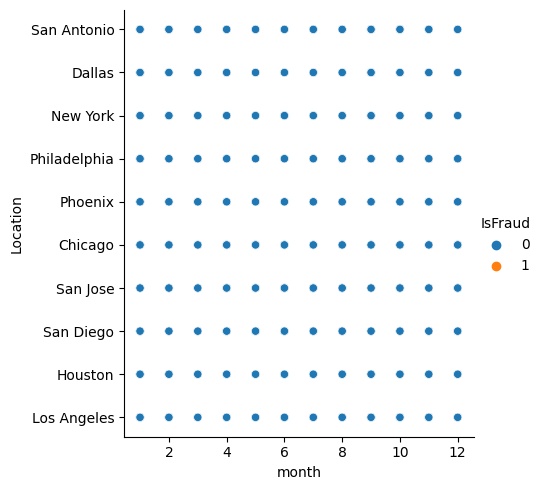

In [14]:
plt.figure(figsize=(12,5))
sns.relplot(data=df,x='month',y='Location',hue='IsFraud')
plt.show()

<Axes: xlabel='Amount', ylabel='Density'>

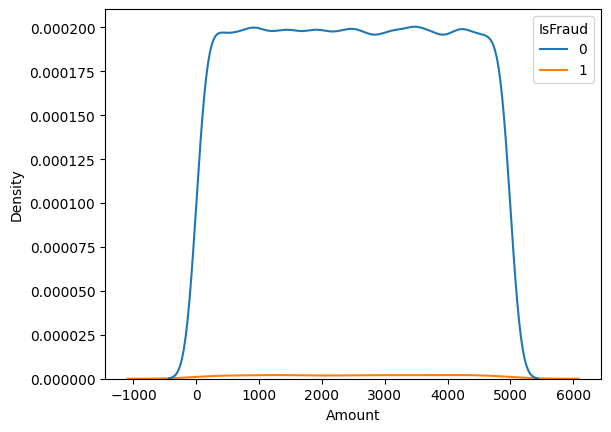

In [15]:
sns.kdeplot(data=df,x='Amount',hue='IsFraud')

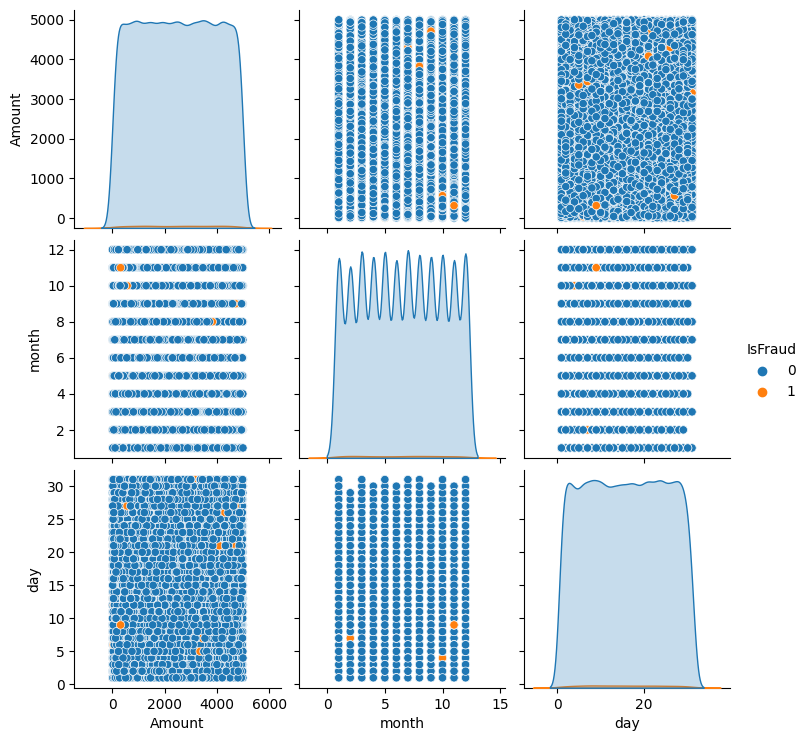

In [16]:
sns.pairplot(df, hue='IsFraud')
plt.show()

# Machine Learning Project

In [17]:
# Drop the 'IsFraud' and 'TransactionType' columns from the dataframe and assign them to x
x = df.drop(['IsFraud','TransactionType'], axis=1)
# Assign the 'IsFraud' column from the dataframe to y
y = df['IsFraud']

In [18]:
# Import the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Fit the LabelEncoder to the 'Location' column of the dataframe and transform it
x['Location'] = le.fit_transform(x['Location'])
# Display the first 5 rows of the dataframe
x.head()

,Amount,Location,month,day
0,4189.27,7,4,3
1,2659.71,1,3,19
2,784.00,4,1,8
3,3514.40,5,4,13
4,369.07,6,7,12


In [19]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Chicago': 0, 'Dallas': 1, 'Houston': 2, 'Los Angeles': 3, 'New York': 4, 'Philadelphia': 5, 'Phoenix': 6, 'San Antonio': 7, 'San Diego': 8, 'San Jose': 9}


<Axes: >

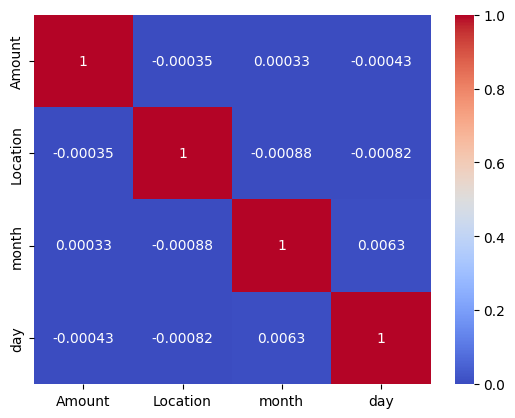

In [20]:
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')

In [21]:
x.describe()


,Amount,Location,month,day
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,2497.092666,4.485300,6.516240,15.782220
std,1442.415999,2.876283,3.448248,8.813795
min,1.050000,0.000000,1.000000,1.000000
25%,1247.955000,2.000000,4.000000,8.000000
50%,2496.500000,4.000000,7.000000,16.000000
75%,3743.592500,7.000000,10.000000,23.000000
max,4999.770000,9.000000,12.000000,31.000000


In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

The proportion of y values that are 1 is 0.01%. This means that the dataset is highly imbalanced, with almost all transactions being legitimate (y=0) and only a very small proportion being fraudulent (y=1). This imbalance can make it difficult to train a machine learning model to accurately detect fraudulent transactions, as the model may be biased towards predicting y=0.
using stratify = y, the train_test_split function will ensure that the proportion of y values is approximately the same in the training and testing sets. This can help to improve the performance of the model by ensuring that it is trained on a more balanced dataset.

In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
# Print the shape of the training and testing sets
print((x_train.shape),(y_train.shape))

(80000, 4) (80000,)


In [24]:
models = {
    'rfe': RandomForestClassifier(random_state=42),
    'lr': LogisticRegression(random_state=42),
    'dt': DecisionTreeClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'nb': GaussianNB(),
    'gb': GradientBoostingClassifier(random_state=42)
}
param_grid ={'rfe':{
    'n_estimators': [10,50,100],
    'max_depth': [None, 10],
    'class_weight': ['balanced']
    },
    'lr':{
    'penalty': ['l1'],
    'C': [0.001, 0.01, 0.1],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
    },
    'dt':{
    'class_weight': ['balanced']
    },
    'knn':{
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance']

    },
    'nb':{},
    'gb':{
    'n_estimators': [10,50,100],
    'learning_rate': [0.01, 0.1, 1]
    }
}

In [25]:
best_models = []
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_models.append(grid_search.best_estimator_)
    y_pred = grid_search.predict(x_test)
    print(f"classification_report for {name}:\n",classification_report(y_test, y_pred, zero_division=0))
    print(f"\nBest Parameters for {name}:\n",grid_search.best_params_)
    print(f"\n\nConfusion Matrix for {name}:\n",confusion_matrix(y_test, y_pred))
    print('-'*60)
    

classification_report for rfe:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000


Best Parameters for rfe:
 {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}


Confusion Matrix for rfe:
 [[19799     1]
 [  200     0]]
------------------------------------------------------------
classification_report for lr:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000


Best Parameters for lr:
 {'C': 0.001, 'class_weight': 'balanced',

In [26]:
print(best_models)

[RandomForestClassifier(class_weight='balanced', random_state=42), LogisticRegression(C=0.001, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear'), DecisionTreeClassifier(class_weight='balanced', random_state=42), KNeighborsClassifier(), GaussianNB(), GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42)]


ROC AUC score for RandomForestClassifier(class_weight='balanced', random_state=42) is 0.5029613636363637


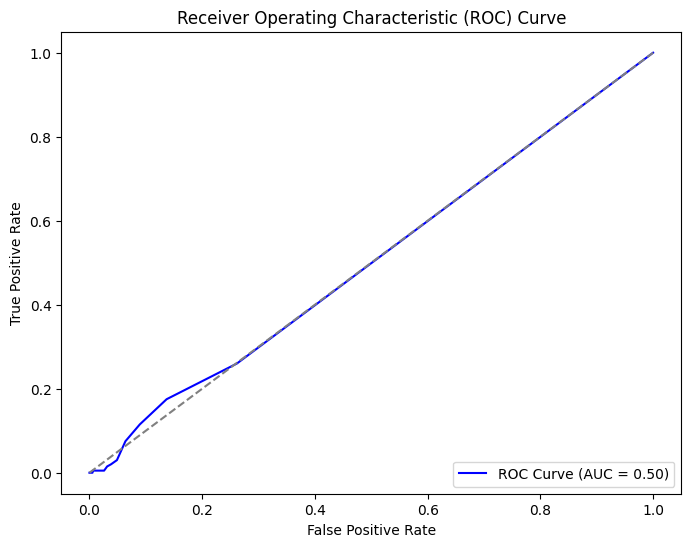

ROC AUC score for LogisticRegression(C=0.001, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear') is 0.5


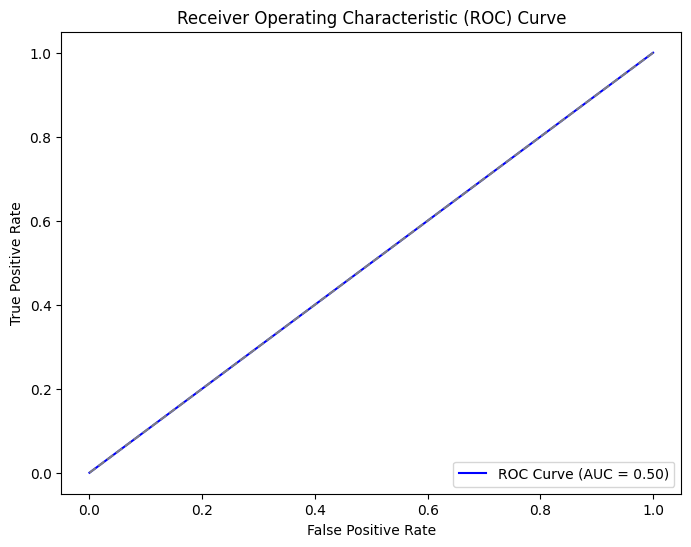

ROC AUC score for DecisionTreeClassifier(class_weight='balanced', random_state=42) is 0.4948989898989899


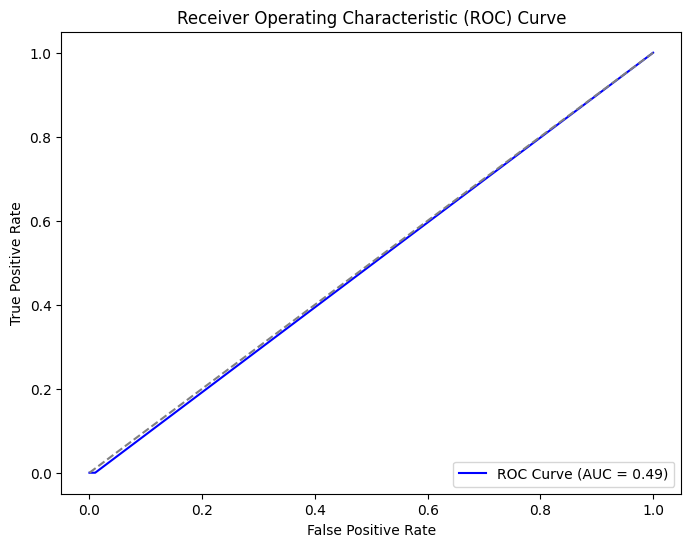

ROC AUC score for KNeighborsClassifier() is 0.49728207070707064


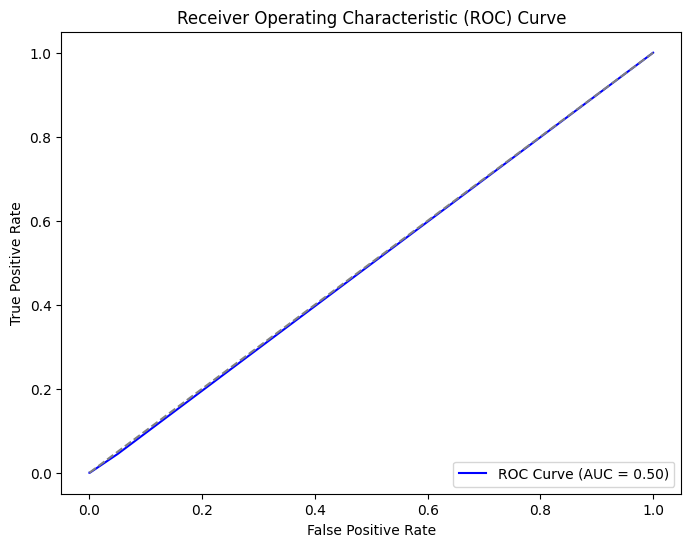

ROC AUC score for GaussianNB() is 0.49839747474747476


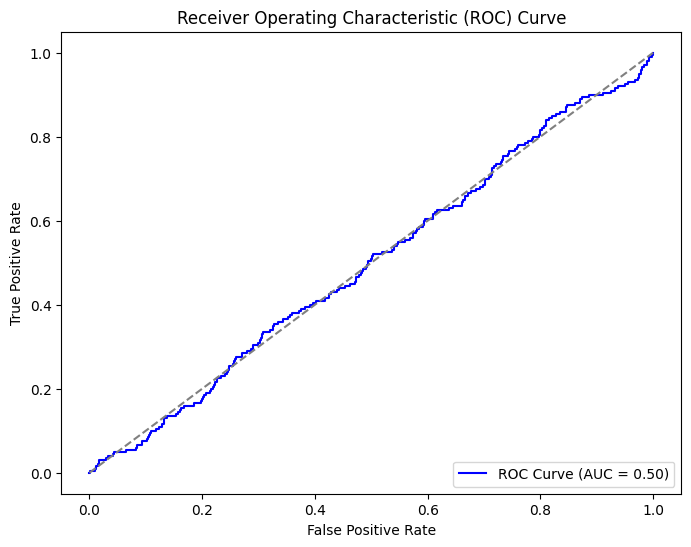

ROC AUC score for GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42) is 0.5214896464646465


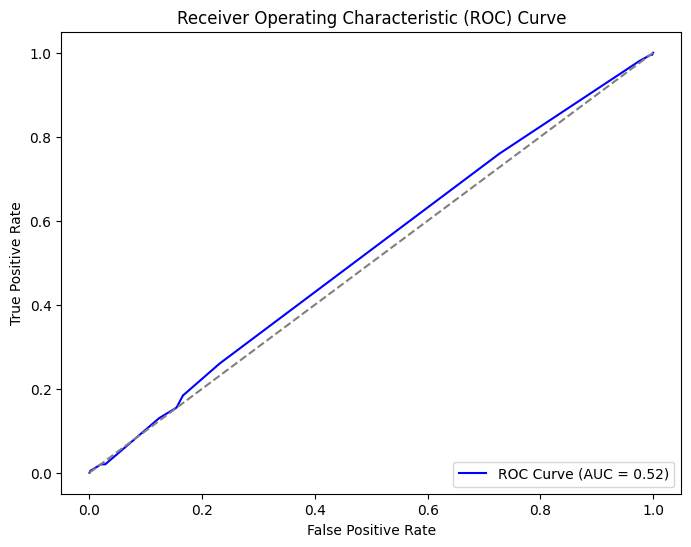

In [27]:
# Try to execute the following code
try:
    # Loop through the best_models list
    for i in best_models:

        # Predict the probabilities of the test set
        y_prob = i.predict_proba(x_test)[:,1]
        # Calculate the ROC AUC score
        auc_score = roc_auc_score(y_test, y_prob)
        # Print the ROC AUC score for the current model
        print(f"ROC AUC score for {i} is {auc_score}")
        
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calculate False Positive Rate and True Positive Rate

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random chance)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

except AttributeError as e:
    print(f"Model:{i} does not have predict_proba method")

